# How to Save Pandas Dataframe as Snowflake Table

#### Major GOTCHA found!!!

#### Pandas dataframe column names must all be UPPERCASE when using sqlalchemy to upload dataframes to Snowflake per this GH [issue](https://github.com/snowflakedb/snowflake-connector-python/issues/513) which as of this writing, they still haven't fixed.

**NOTE:** With large dataframes, it is suggested that you use the pd_writer that comes with Snowflakes' pandas_tools.

In [1]:
from pathlib import Path
import snowflake.connector as sfc
from snowflake.connector.pandas_tools import pd_writer
from snowflake.sqlalchemy import URL
from sqlalchemy import create_engine
import configparser
import pandas as pd

#### Obtain credentials from a config file

In [2]:
config = configparser.ConfigParser()
config.read(Path.home() / '.config' / 'config.ini')
SF_USERNAME = config['snowflake']['USERNAME']
SF_PASSWORD = config['snowflake']['PASSWORD']
SF_ACCOUNT = config['snowflake']['ACCOUNT']
SF_AUTHENTICATOR = config['snowflake']['AUTHENTICATOR']

#### Send SQL Query and Return Results as Pandas Dataframe

In [3]:
with sfc.connect(
    user=SF_USERNAME,
    password=SF_PASSWORD,
    account=SF_ACCOUNT,
    authenticator=SF_AUTHENTICATOR,
    database = 'your_db',
    schema = 'your_schema',
    warehouse = 'your_warehouse',
    role='your_role',
) as conn:
    sql = "SELECT current_version()"
    df = pd.read_sql(sql, conn)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


#### Let's View the Contents of our Dataframe

In [4]:
df

,CURRENT_VERSION()
0,5.41.1


## Saving Pandas Dataframe as a Snowflake Table

In [5]:
engine = create_engine(
    URL(
        user=SF_USERNAME,
        password=SF_PASSWORD,
        account=SF_ACCOUNT,
        authenticator=SF_AUTHENTICATOR,
        database = 'IPL_TV_DB',
        schema = 'VEHICLE_DATA_EVAL',
        warehouse = 'IPO_QUERY_WH',
        role='ANLPROD_TV_ROLE',
    )
)

In [6]:
TABLE_NAME = 'version_df'

In [7]:
with engine.connect() as conn:
    df.to_sql(name=TABLE_NAME, con=conn, index=False, method=pd_writer)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


## To confirm that the newly created table is now in Snowflake, we can query using a SQL client like DBeaver:

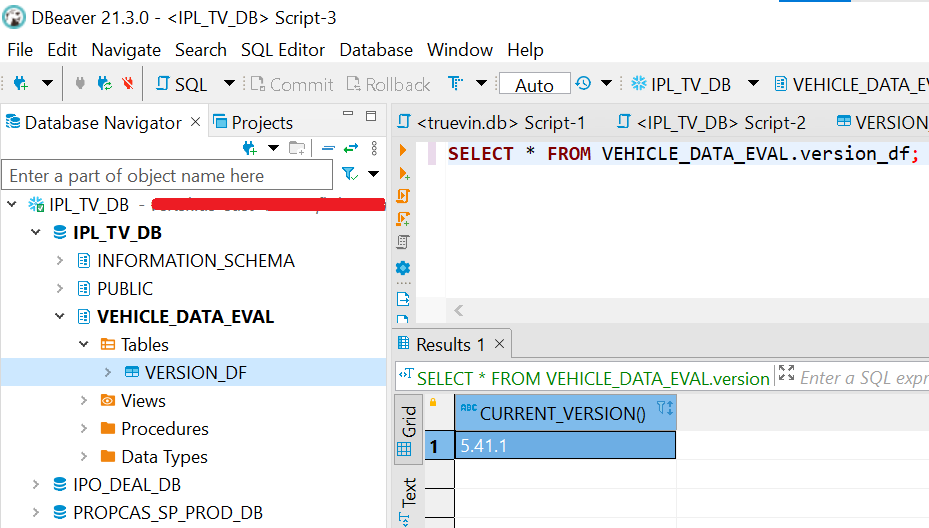

In [11]:
from IPython.display import Image
Image("images/Snowflake_DBeaver.png")

## Or use Python API

In [9]:
with sfc.connect(
    user=SF_USERNAME,
    password=SF_PASSWORD,
    account=SF_ACCOUNT,
    authenticator=SF_AUTHENTICATOR,
    database = 'your_db',
    schema = 'your_schema',
    warehouse = 'your_warehouse',
    role='your_role',
) as conn:
    sql = "SELECT * FROM VEHICLE_DATA_EVAL.version_DF"
    df = pd.read_sql(sql, conn)

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...


In [10]:
df

,CURRENT_VERSION()
0,5.41.1
